In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#plt.style.use(['science' ,'notebook'])
import sympy as sym
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2
%matplotlib notebook

# Different Types of Fourier Transforms

## 1- Fourier Tranform (Continuous time and frequency)

This occurs when the function form of the time series is known analytically
and goes from -$\infty$ to $\infty$

$$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-2 \pi i f t} dt $$

 **Solving Analitically (If possible):**

In [19]:
# x: function
# f: frequency
# t: time
t, f = sym.symbols('t, f', real=True)
k = sym.symbols('k', real=True, positive=True)
# define the function x
x = sym.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [15]:
from sympy.integrals.transforms import fourier_transform

In [18]:
# find the Fourier Transform of x
x_FT = fourier_transform(x, t, f)
x_FT # exact formula

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

### If sympy cannot solve integrals analytically, we use scipy

In [20]:
from scipy.integrate import quad

In [49]:
# write the function and the formula of the Fourier Transform

def x(t, k): # x(t, k)
    return np.exp(-k*t**2)*np.sin(k*t)*t**4
def get_x_FT(x, f, k): # Fourier Transform
    # compute the real component of the function to be integrated
    x_FT_integrand_real = lambda t: np.real( x(t,k)*np.exp(-2*np.pi*1j*f*t) )
    # compute the imaginary component of the function to be integrated
    x_FT_integrand_comp = lambda t: np.imag( x(t,k)*np.exp(-2*np.pi*1j*f*t) )
    # real part of the integral value
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real + 1j*x_FT_comp

Get frequencies and Fourier Transform values

In [50]:
# look at the frequencies from -4 to 4
f = np.linspace(-4, 4, 100)
# compute the Fourier Transform
x_FT = np.vectorize(get_x_FT)(x, f, k=2)

<IPython.core.display.Javascript object>


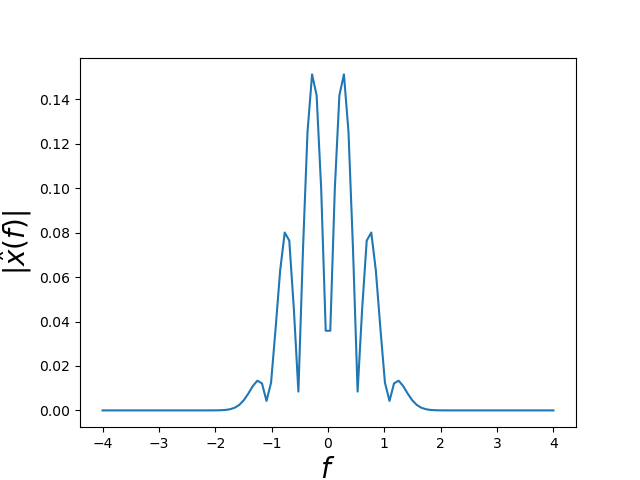

Text(0.5, 0, '$f$')

In [51]:
#plot
plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)